<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install -q qiskit

In [32]:
!pip install -q pylatexenc

In [33]:
!pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Preparing metadata (setup.py) ... done


In [34]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Operator

In [35]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):

    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)

    # create the identity matrix on n qubits
    oracle_matrix = np.identity(2**n)
    # add the -1 phase to marked elements
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))

    return qc

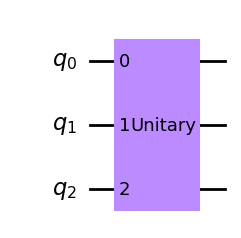

In [36]:
qc2 = QuantumCircuit(3)
oracle_matrix = np.identity(2**3)
    # add the -1 phase to marked element

indices_to_mark = [1,3]
for index_to_mark in indices_to_mark:
    oracle_matrix[index_to_mark, index_to_mark] = -1


qc2.unitary(Operator(oracle_matrix), range(3))
qc2.draw("mpl")

In [37]:
def diffuser(n):

    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')

    ### WRITE YOUR CODE BETWEEN THESE LINES - START

    # apply hadamard gates to all qubits
    qc.h(range(n))
    # call the phase oracle applied to the zero state
    qc.append(phase_oracle(n, [0]), range(n))
    # apply hadamard gates to all qubits
    qc.h(range(n))
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return qc

6 qubits, basis states [1, 42] marked, 4 rounds


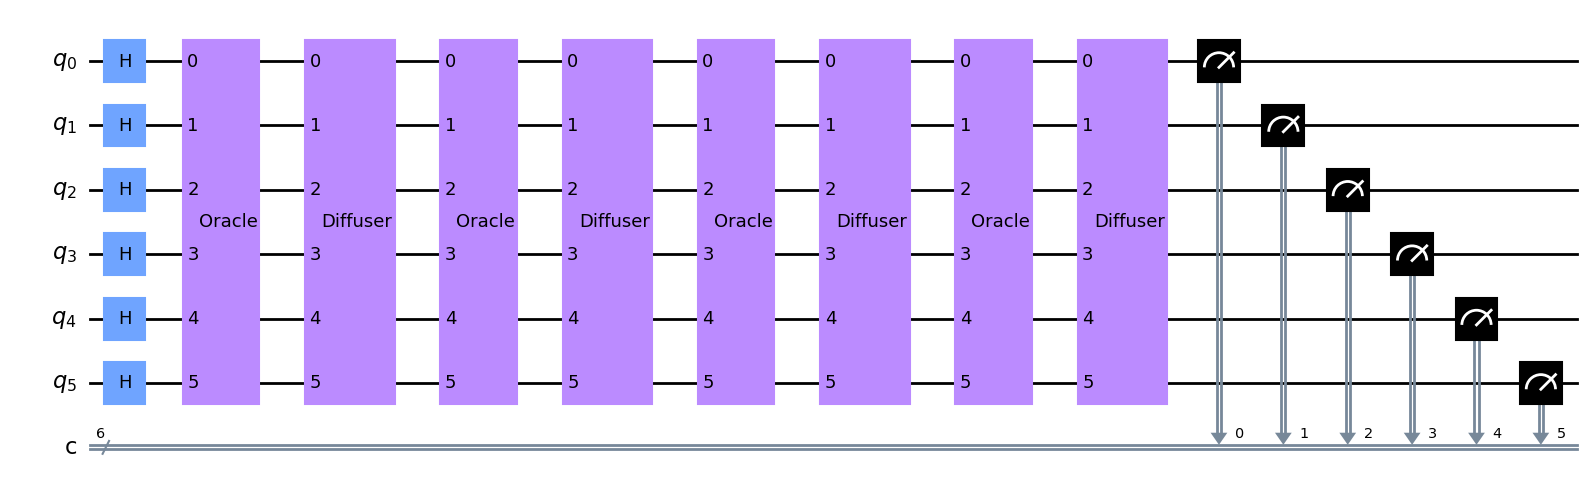

In [38]:
def Grover(n, indices_of_marked_elements):

    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)

    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')

    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))

    # step 2: apply r rounds of the phase oracle and the diffuser
    for _ in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        qc.append(diffuser(n), range(n))

    # step 3: measure all qubits
    qc.measure(range(n), range(n))

    return qc

mycircuit = Grover(6, [1, 42])
mycircuit.draw("mpl")

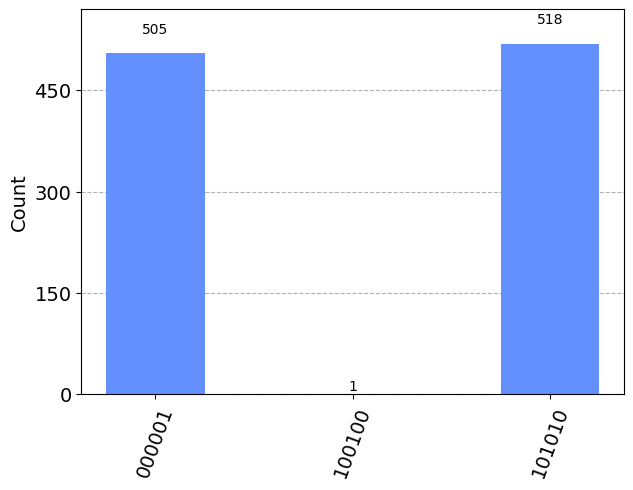

In [39]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(mycircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)